In [1]:
# Input info
#se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/cluster_clone_counts_donors/"
# se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
input_col = "Input"
# use_input = False
# min_cell = 10

outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/cluster_clone_counts/sepDonors"
se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
use_input = False
min_cell = 10

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import colorcet as cc
%matplotlib inline
import numpy as np

In [3]:
sns.set(font_scale = 1.3)


In [4]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

In [5]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
if "cluster_labels" in se_cells_meta.columns:
    se_cells_meta = se_cells_meta.rename({"cluster_labels":"nuclear_clusters"}, axis=1)
else:
    se_cells_meta = se_cells_meta.rename({"seurat_clusters":"nuclear_clusters"}, axis=1)

palette = sns.color_palette(cc.glasbey, n_colors=len(se_cells_meta["nuclear_clusters"].unique()))
hue_order = se_cells_meta.groupby("nuclear_clusters").size().sort_values()[::-1].index
color_d = {key:val for key, val in zip(hue_order, palette)}

se_cells_meta

### Remove None before normalizing
if use_input:
    se_cells_meta = se_cells_meta[se_cells_meta["orig.ident"] == input_col]
se_cells_meta = se_cells_meta[se_cells_meta["donor"] != "None"]
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
Flt3l_AAACGAAGTCTGATTG-1,Flt3l,4239,4239,15047,1940,50,52,636,4173,8196,...,6,5280,4119,AAACGAAGTCTGATTG-1_Flt3l,Flt3l_AAACGAAGTCTGATTG-1,2,0,Flt3l,0_2,HSPC 3
Flt3l_AAACTCGGTAGGTCTT-1,Flt3l,2925,2925,13052,1674,43,26,526,4014,6769,...,3,4538,3532,AAACTCGGTAGGTCTT-1_Flt3l,Flt3l_AAACTCGGTAGGTCTT-1,16,1,Flt3l,1_16,B-cell lineage
Flt3l_AAAGGGCAGACTTCCA-1,Flt3l,3562,3562,14297,2199,46,34,695,3497,7826,...,4,4653,3642,AAAGGGCAGACTTCCA-1_Flt3l,Flt3l_AAAGGGCAGACTTCCA-1,13,0,Flt3l,0_13,Classical Monocyte
Flt3l_AAATGAGGTATCCTTT-1,Flt3l,4915,4915,16671,2497,75,62,760,2906,10371,...,9,6459,4673,AAATGAGGTATCCTTT-1_Flt3l,Flt3l_AAATGAGGTATCCTTT-1,18,0,Flt3l,0_18,Non-classical monocyte
Flt3l_AAATGCCGTGATAAGT-1,Flt3l,3886,3886,15323,2276,44,49,723,3740,8491,...,4,5109,3980,AAATGCCGTGATAAGT-1_Flt3l,Flt3l_AAATGCCGTGATAAGT-1,6,0,Flt3l,0_6,Classical Monocyte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTGTTTCTTAC-1,Input,3580,3580,17067,3257,63,80,461,8097,5109,...,0,3738,2899,TTTGTGTGTTTCTTAC-1_Input,Input_TTTGTGTGTTTCTTAC-1,1,0,Input,0_1,HPSC 1
Input_TTTGTGTTCCTGAAAC-1,Input,4328,4328,30427,8323,84,99,799,12146,8976,...,7,5839,4144,TTTGTGTTCCTGAAAC-1_Input,Input_TTTGTGTTCCTGAAAC-1,27,0,Input,0_27,Erythroid lineage
Input_TTTGTGTTCGGGAAAC-1,Input,8010,8010,40114,14032,169,160,1561,10102,14090,...,0,9421,5890,TTTGTGTTCGGGAAAC-1_Input,Input_TTTGTGTTCGGGAAAC-1,19,0,Input,0_19,HPSC 1
Input_TTTGTGTTCGGGACAA-1,Input,3286,3286,22721,4421,43,84,546,11692,5935,...,3,4303,3323,TTTGTGTTCGGGACAA-1_Input,Input_TTTGTGTTCGGGACAA-1,2,1,Input,1_2,B-cell lineage


In [6]:
clone_counts = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]

clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)

log2_clone_counts_df = clone_counts_df.copy()
log2_clone_counts_df[hue_order] = np.log2(1+log2_clone_counts_df[hue_order])
log2_clone_counts_df

# clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=min_cell]
# clone_counts_filt_10_df


,donor,ncells,B-cell lineage,Basophil;Eosinophil,Classical Monocyte,Erythroid lineage,HPSC 1,HPSC 2,HSPC 3,HSPC 4,Neutrophil,Non-classical monocyte,pDC,pre-B cells
name,,,,,,,,,,,,,,
0_0,0,429,3.700440,3.906891,3.906891,4.754888,7.357552,6.768184,4.169925,1.584963,4.247928,1.000000,4.807355,4.807355
1_0,1,317,3.906891,3.584963,0.000000,5.426265,6.209453,6.781360,5.209453,2.000000,3.321928,1.000000,3.807355,2.807355
0_1,0,268,2.584963,3.000000,3.000000,4.700440,6.727920,6.169925,3.321928,0.000000,2.807355,1.584963,3.459432,4.459432
0_2,0,230,3.321928,3.321928,2.000000,4.459432,6.507795,5.906891,3.000000,1.000000,2.807355,3.169925,3.584963,2.807355
1_1,1,196,2.000000,2.000000,2.584963,4.807355,5.977280,5.906891,4.523562,0.000000,3.321928,0.000000,2.584963,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0_34,0,23,1.000000,0.000000,0.000000,1.000000,3.169925,3.169925,1.000000,0.000000,0.000000,1.584963,1.000000,1.000000
1_23,1,22,0.000000,0.000000,0.000000,2.000000,2.584963,3.321928,2.584963,0.000000,0.000000,0.000000,0.000000,0.000000
0_35,0,21,1.000000,1.000000,0.000000,2.000000,2.807355,3.169925,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000


## Fate correlation

### a) Donors in sequenced run combined

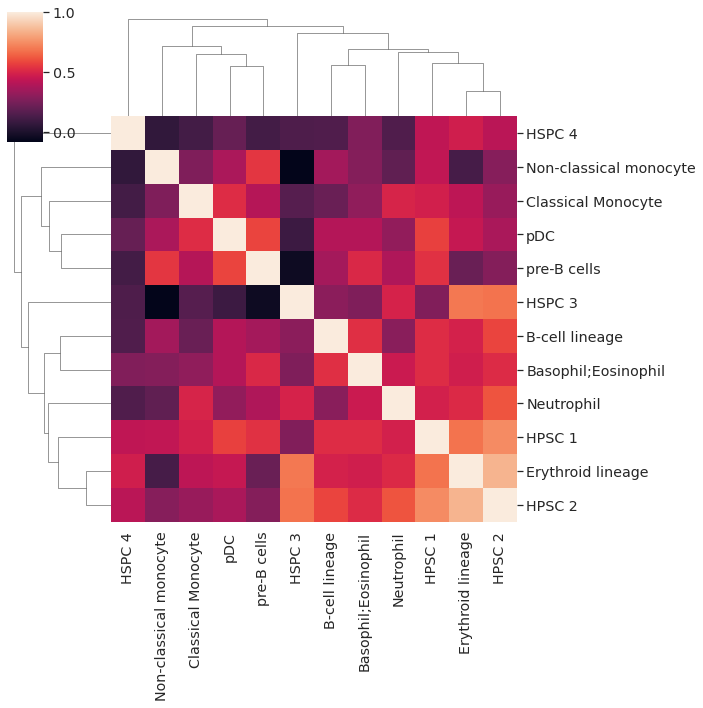

In [7]:
corr_df = log2_clone_counts_df.drop(["ncells", "donor"],axis=1).corr(method="spearman")
corr_df
sns.clustermap(corr_df)

### b) Separate donors, min_cell=min_cell

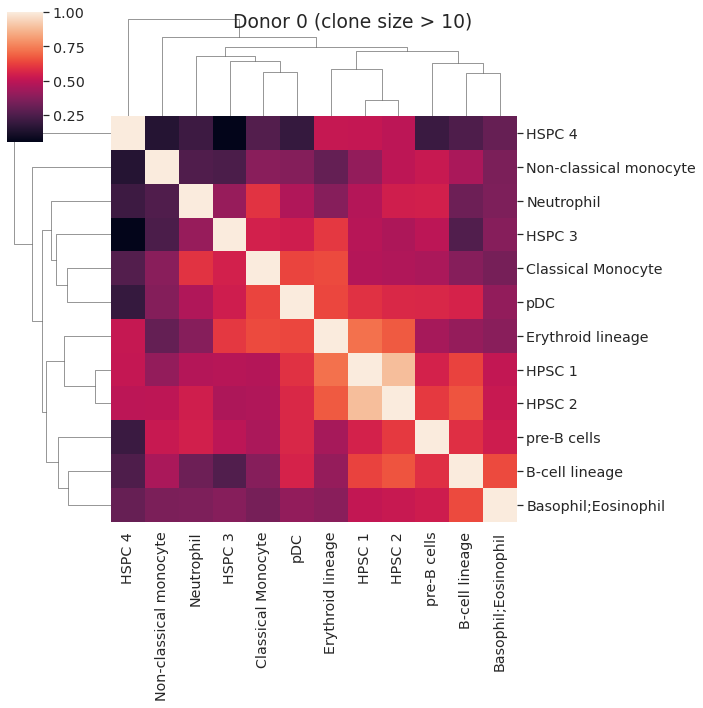

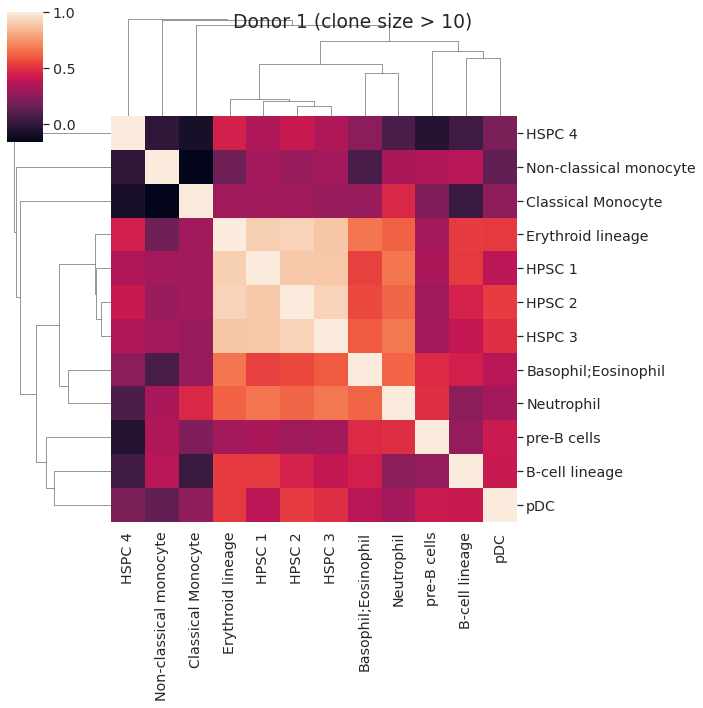

In [8]:
for don, val in log2_clone_counts_df.groupby("donor"):
    tmp = keep_top_clones(val, min_cell=min_cell)
    corr_df = tmp.drop(["ncells", "donor"],axis=1).corr(method="spearman")
    corr_df

    sns.clustermap(corr_df)
    plt.suptitle(f"Donor {don} (clone size > {min_cell})")

### c) Separate donors, min_cell is 50

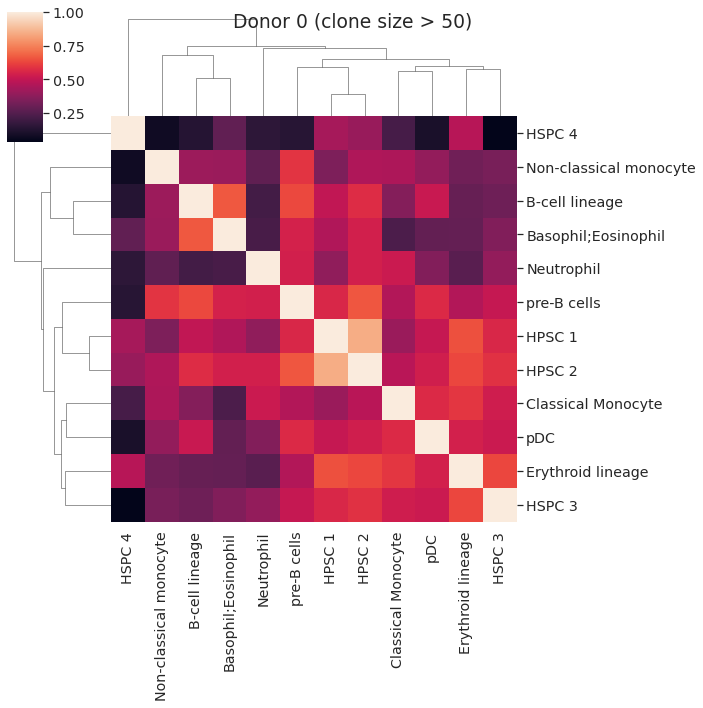

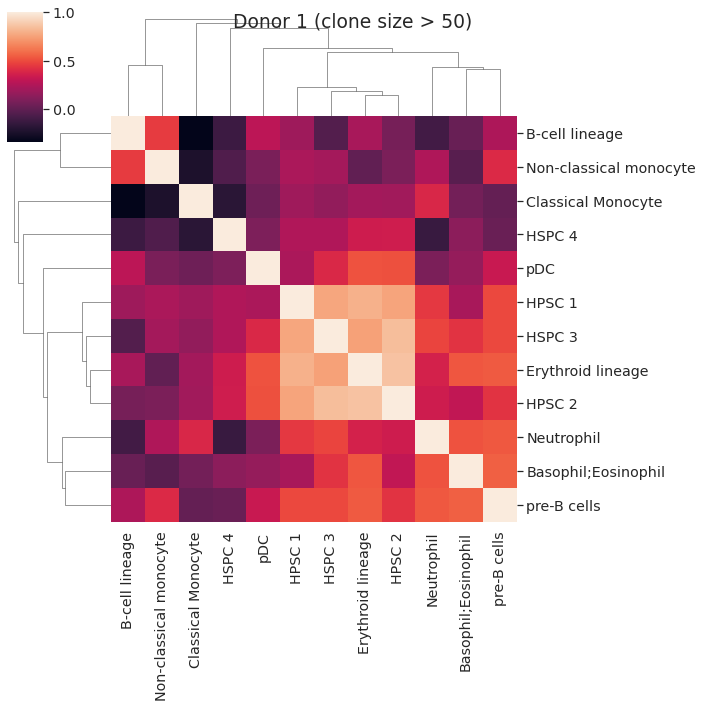

In [9]:
for don, val in log2_clone_counts_df.groupby("donor"):
    tmp = keep_top_clones(val, min_cell=50)
    corr_df = tmp.drop(["ncells", "donor"],axis=1).corr(method="spearman")
    corr_df

    sns.clustermap(corr_df)
    plt.suptitle(f"Donor {don} (clone size > 50)")

### d) Normalize per clone, run donors separately

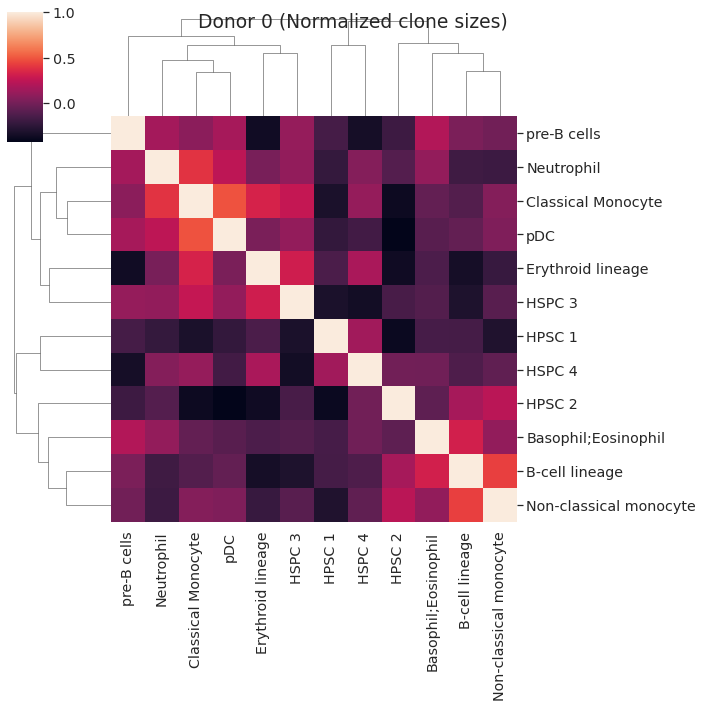

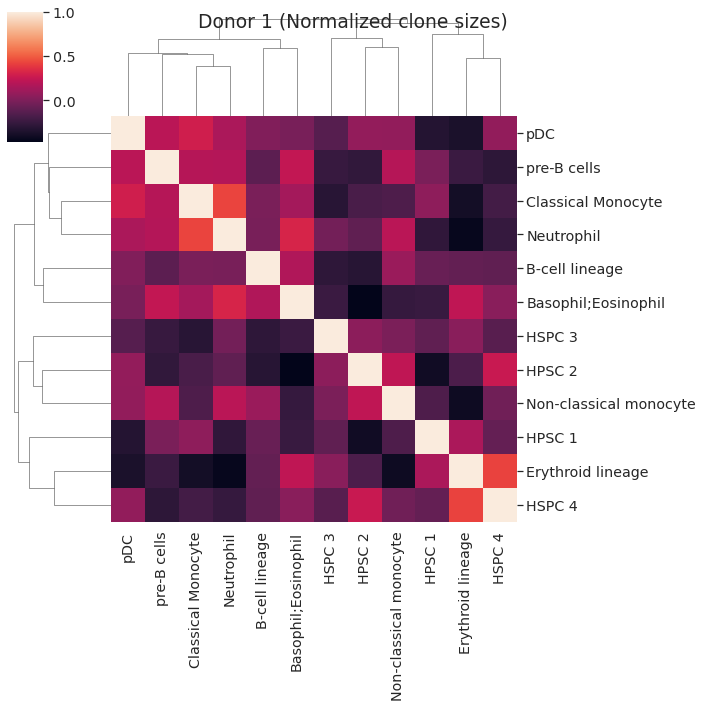

In [10]:
clone_sums = clone_counts.groupby("name").sum()["ncells"]
clone_norm = clone_counts.copy()
clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/clone_sums.loc[(x["name"])] , axis=1)
clone_norm = clone_norm[~(clone_norm["name"]=="None")]
clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_norm[clone_norm["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]

clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_norm_df.head()

for don, val in clone_norm_df.groupby("donor"):
    corr_df = val.drop(["ncells", "donor"],axis=1).corr(method="spearman")
    sns.clustermap(corr_df)
    plt.suptitle(f"Donor {don} (Normalized clone sizes)")

In [11]:
# vals = np.sort(list(set(clone_norm_df.drop(["donor","ncells"],axis=1).values.flatten())))[::-1]
# vals = vals[vals!=1]
# vals

# def repr_vals(x, n=2):
#     """Assumes values are sorted"""
#     x_len = len(x)
#     top = x[:min(len(x),n)]
#     bot = []
#     if x_len >= n*2:
#         bot = x[::-1][:n]
#         mid = []
#         if x_len >= n*3:
#             mid = x[int((len(x)/2)-(n/2)): int((len(x)/2)+(n/2))]
            
#     return np.concatenate((top, bot, mid))
# corr_vals = repr_vals(vals, n=2)
# corr_vals



# corr_df = clone_norm_df.drop(["ncells", "donor"],axis=1).corr(method="spearman")
# repr_corr = corr_df.isin(corr_vals)
# repr_corr_inds = repr_corr[repr_corr > 0].stack().index.tolist()
# repr_corr_inds_df = pd.DataFrame(repr_corr_inds)
# repr_corr_inds_df["nm"] = repr_corr_inds_df.apply(lambda x: "-MERGE-".join(np.sort(x.values)), axis=1)
# repr_corr_inds


# repr_corr_inds_df = repr_corr_inds_df.loc[~(repr_corr_inds_df.duplicated(subset=["nm"]))].drop("nm", axis=1)
# repr_corr_inds_df["spearman corr"] = repr_corr_inds_df.apply(lambda x: corr_df.loc[x[0], x[1]], axis=1)
# repr_corr_inds_df = repr_corr_inds_df.sort_values("spearman corr")[::-1]
# repr_corr_inds_df

# corr_cat_df = []
# for ind, val in repr_corr_inds_df.iterrows():
#     curr = clone_norm_df.loc[:,[val[0], val[1]]].copy()
#     curr["comp"] = f'{"__".join(curr.columns)} (spearman r={val["spearman corr"]:.3f})'
#     curr = curr.rename({val:str(ind) for ind, val in enumerate([val[0], val[1]])}, axis=1)
#     corr_cat_df.append(curr)
# curr

# sns.lmplot(data=pd.concat(corr_cat_df,axis=0), x="0", y="1", hue="comp", height=12)
# plt.ylabel("norm ncells")
# plt.xlabel("norm ncells")


---

## e) Separate clones into conditions and run for combined and separate

In [12]:
cl_cond_counts_df = se_cells_meta.groupby(["nuclear_clusters", "condition", "donor", "name"]).size().reset_index().rename({0:"ncells"}, axis=1)
cl_cond_counts_df
wide_cl_cond_counts_df = cl_cond_counts_df.reset_index().pivot(columns="nuclear_clusters", index=["condition", "donor",
                                                                                       "name"], values="ncells").fillna(0)
wide_cl_cond_counts_df

nuclear_clusters      B-cell lineage  Basophil;Eosinophil  Classical Monocyte  \
condition donor name                                                            
Flt3l     0     0_0              5.0                  7.0                10.0   
                0_1              1.0                  1.0                 5.0   
                0_10             0.0                  0.0                 1.0   
                0_11             2.0                  2.0                 1.0   
                0_12             1.0                  0.0                 1.0   
...                              ...                  ...                 ...   
Input     1     1_5              3.0                  3.0                 1.0   
                1_6              5.0                  3.0                 1.0   
                1_7              6.0                  2.0                 0.0   
                1_8              2.0                  3.0                 0.0   
                1_9              3.0                  1.0                 0.0   

nuclear_clusters      Erythroid lineage  HPSC 1  HPSC 2  HSPC 3  HSPC 4  \
condition donor name                                                      
Flt3l     0     0_0                 0.0     0.0     0.0     5.0     0.0   
                0_1                 0.0     0.0     0.0     2.0     0.0   
                0_10                0.0     0.0     0.0     1.0     0.0   
                0_11                0.0     0.0     0.0     0.0     0.0   
                0_12                0.0     0.0     0.0     0.0     0.0   
...                                 ...     ...     ...     ...     ...   
Input     1     1_5                23.0    27.0    71.0    26.0     1.0   
                1_6                19.0    33.0    49.0    17.0     0.0   
                1_7                17.0    28.0    56.0    18.0     0.0   
                1_8                20.0    33.0    51.0    16.0     1.0   
                1_9                11.0    33.0    49.0    17.0     0.0   

nuclear_clusters      Neutrophil  Non-classical monocyte  pDC  pre-B cells  
condition donor name                                                        
Flt3l     0     0_0         14.0                     0.0  0.0          0.0  
                0_1          4.0                     0.0  0.0          0.0  
                0_10         4.0                     0.0  0.0          0.0  
                0_11         1.0                     0.0  0.0          0.0  
                0_12         4.0                     0.0  0.0          0.0  
...                          ...                     ...  ...          ...  
Input     1     1_5          2.0                     0.0  4.0          0.0  
                1_6          4.0                     1.0  2.0          2.0  
                1_7          2.0                     1.0  3.0          2.0  
                1_8          3.0                     0.0  1.0          0.0  
                1_9          3.0                     1.0  1.0          1.0  

[116 rows x 12 columns]

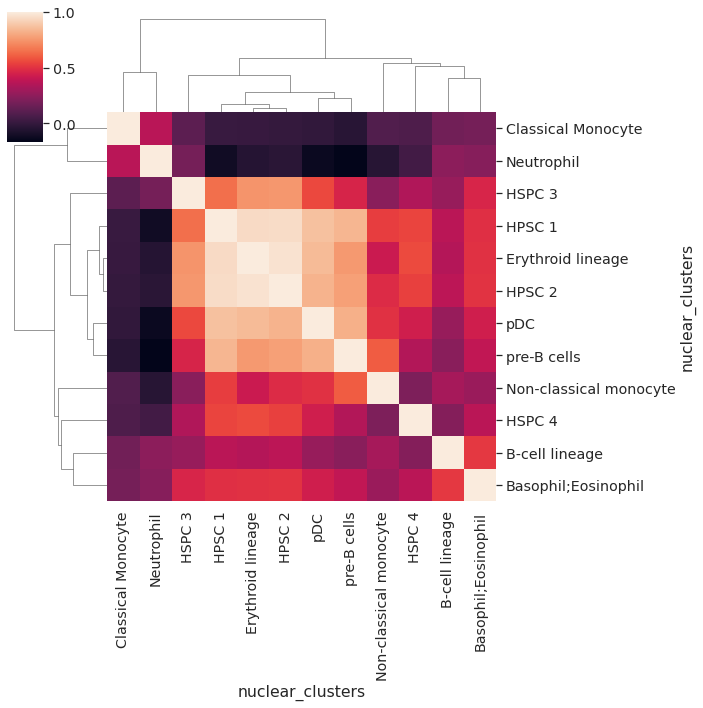

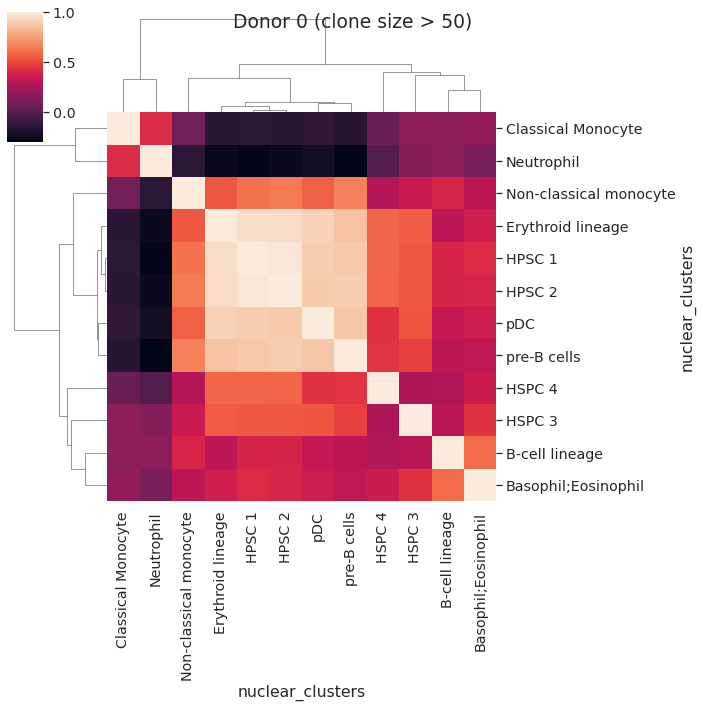

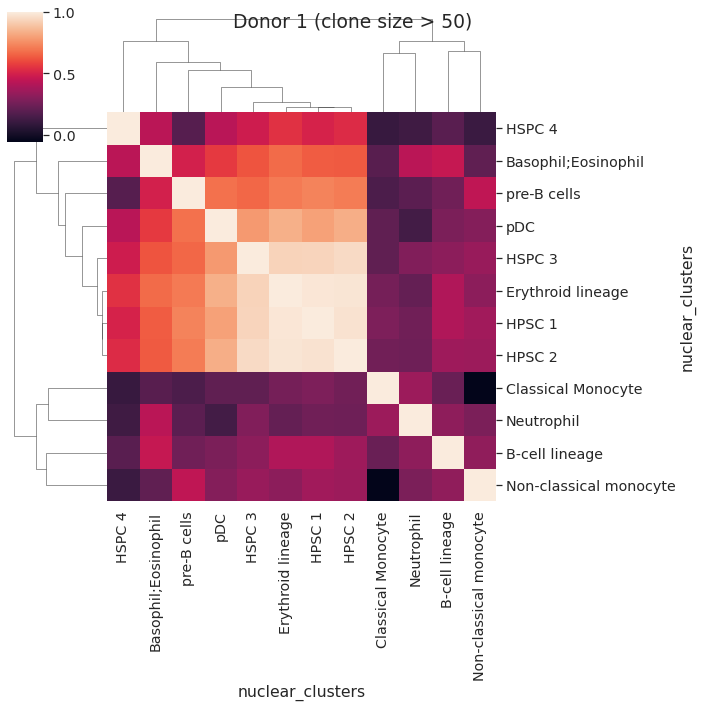

In [13]:
log2_clone_counts_df = wide_cl_cond_counts_df.copy()
log2_clone_counts_df[hue_order] = np.log2(1+log2_clone_counts_df[hue_order])

corr_df = log2_clone_counts_df.corr(method="spearman")
corr_df
sns.clustermap(corr_df)

for don, val in log2_clone_counts_df.reset_index().groupby("donor"):
    corr_df = val.drop(["condition", "donor", "name"],axis=1).corr(method="spearman")
    sns.clustermap(corr_df)
    plt.suptitle(f"Donor {don} (clone size > 50)")

## Get top, middle, and bottom 2 correlations

Text(0.5, 31.848000000000027, 'log2 ncells')

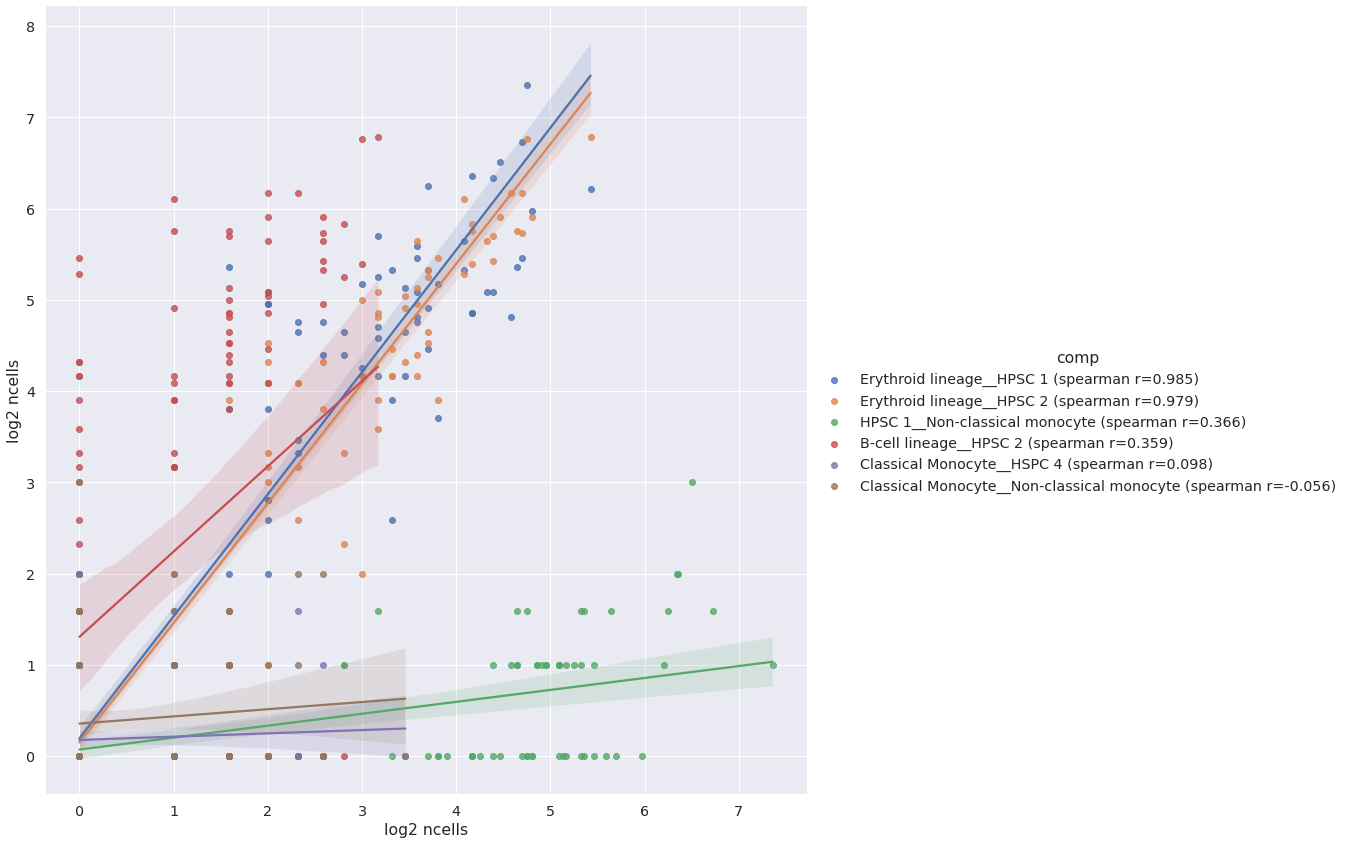

In [14]:
vals = np.sort(list(set(corr_df.values.flatten())))[::-1]
vals = vals[vals!=1]
vals

def repr_vals(x, pct=(0,50,100), n=2):
    """Assumes values are sorted"""
    x_len = len(x)
    top = x[:min(len(x),n)]
    bot = []
    if x_len >= n*2:
        bot = x[::-1][:n]
        mid = []
        if x_len >= n*3:
            mid = x[int((len(x)/2)-(n/2)): int((len(x)/2)+(n/2))]
            
    return np.concatenate((top, bot, mid))
corr_vals = repr_vals(vals, pct=(0,50,100), n=2)
corr_vals

repr_corr = corr_df.isin(corr_vals)
repr_corr_inds = repr_corr[repr_corr > 0].stack().index.tolist()
repr_corr_inds_df = pd.DataFrame(repr_corr_inds)
repr_corr_inds_df["nm"] = repr_corr_inds_df.apply(lambda x: "-MERGE-".join(np.sort(x.values)), axis=1)

repr_corr_inds_df = repr_corr_inds_df.loc[~(repr_corr_inds_df.duplicated(subset=["nm"]))].drop("nm", axis=1)
repr_corr_inds_df["spearman corr"] = repr_corr_inds_df.apply(lambda x: corr_df.loc[x[0], x[1]], axis=1)
repr_corr_inds_df = repr_corr_inds_df.sort_values("spearman corr")[::-1]
repr_corr_inds_df

corr_cat_df = []
for ind, val in repr_corr_inds_df.iterrows():
    curr = log2_clone_counts_df.loc[:,[val[0], val[1]]].copy()
    curr["comp"] = f'{"__".join(curr.columns)} (spearman r={val["spearman corr"]:.3f})'
    curr = curr.rename({val:str(ind) for ind, val in enumerate([val[0], val[1]])}, axis=1)
    corr_cat_df.append(curr)
curr

sns.lmplot(data=pd.concat(corr_cat_df,axis=0), x="0", y="1", hue="comp", height=12)
plt.ylabel("log2 ncells")
plt.xlabel("log2 ncells")


## Pairplot of clusters

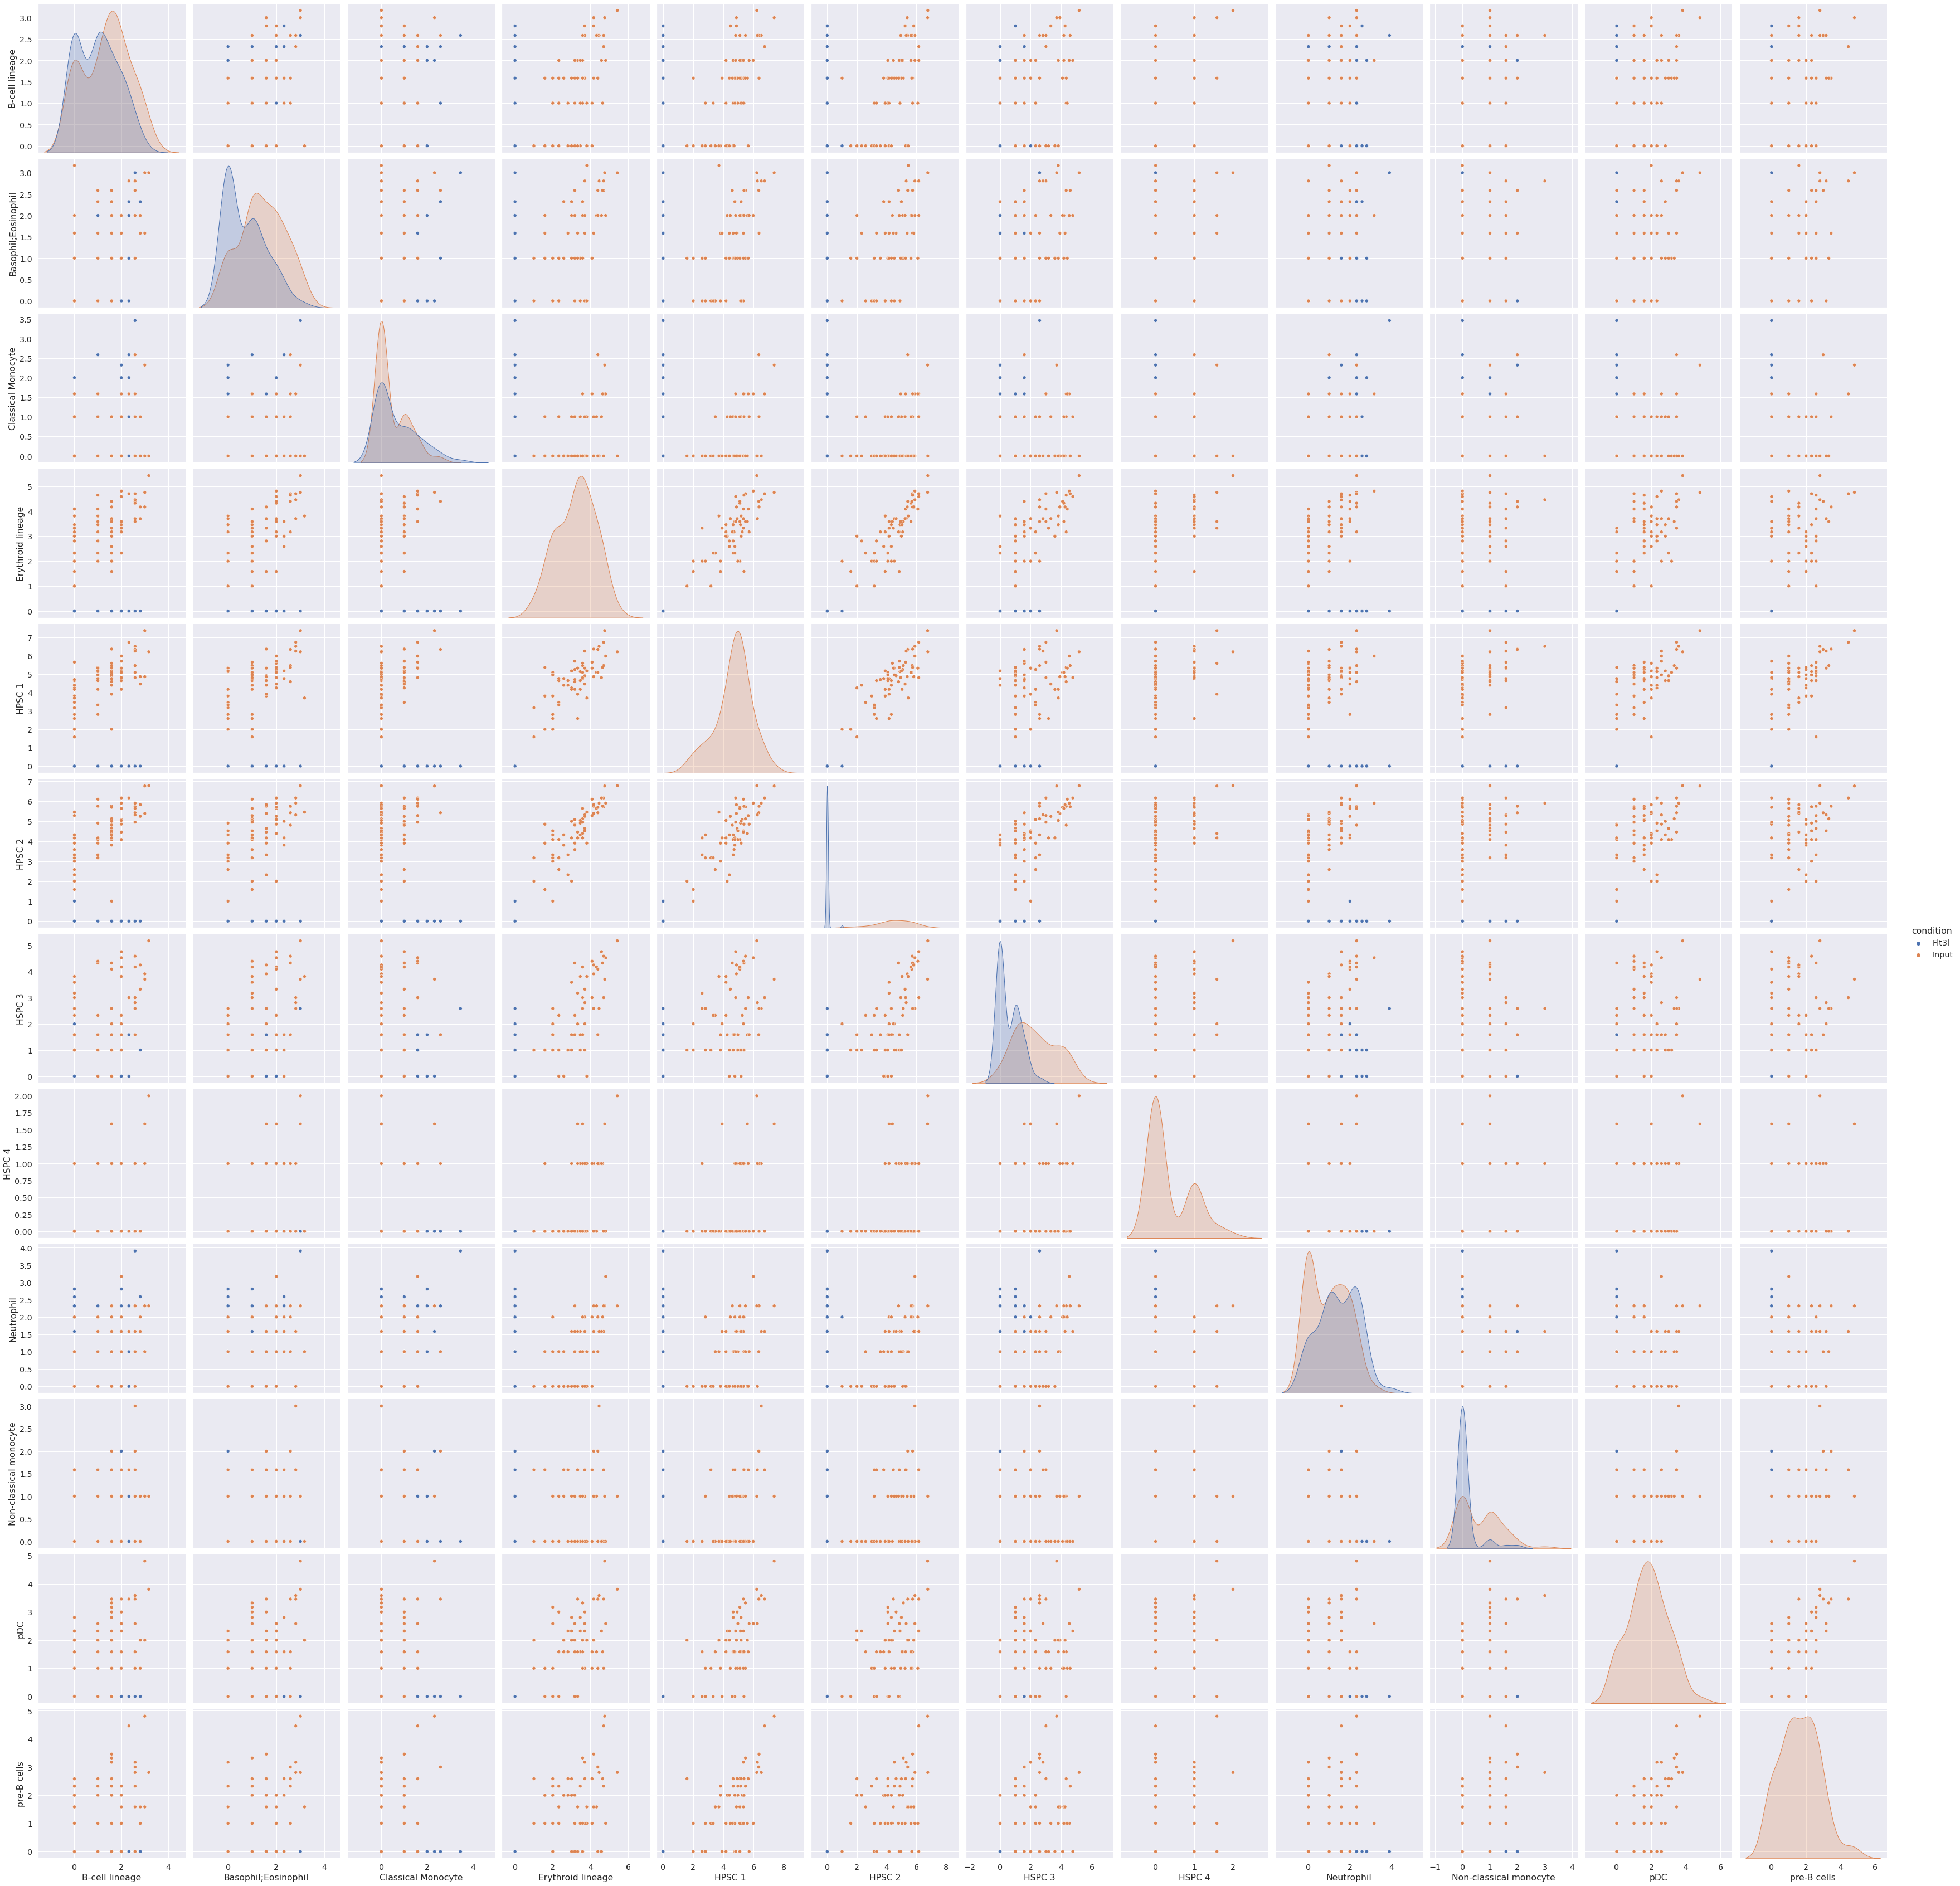

In [15]:
g = sns.pairplot(log2_clone_counts_df.reset_index().drop(["name","donor"], axis=1), hue="condition", height=4)

---

---

---

In [16]:
outdir

'/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/cluster_clone_counts/sepDonors'